# Jayden Jayawardhena

## Research question/interests

I am interested in which metal oxides were more present at given seasons throughout the year.

In [46]:
import pandas as pd

data = pd.read_csv("../data/raw/AirQuality.csv",sep=';')
data = data.drop(['Unnamed: 15','Unnamed: 16'],axis=1)
data = data.dropna(how='any')
data = data[(data != -200).all(1)]

display(data)



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,30/04/2004,20.00.00,"4,4",1449.0,501.0,"19,5",1282.0,254.0,625.0,133.0,2100.0,1569.0,"19,1","61,1","1,3345"
1227,30/04/2004,21.00.00,"3,1",1363.0,234.0,"15,1",1152.0,189.0,684.0,110.0,1951.0,1495.0,"18,2","65,4","1,3529"
1228,30/04/2004,22.00.00,3,1371.0,212.0,"14,6",1136.0,174.0,689.0,102.0,1927.0,1471.0,"18,1","66,1","1,3579"
1229,30/04/2004,23.00.00,"3,1",1406.0,275.0,"13,7",1107.0,167.0,718.0,108.0,1872.0,1384.0,"17,7","66,9","1,3422"


# EDA

[Text(0.5, 1.0, 'Average Tin Oxide Detections Throught The Day'),
 Text(0.5, 0, '24-Hour Time'),
 Text(0, 0.5, 'Sensor Detections')]

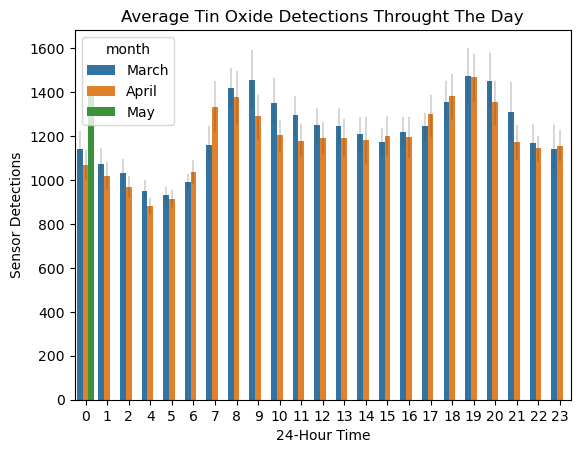

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

data['datetime'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['month'] = data['datetime'].dt.month_name()
data['Time'] = data['Time'].astype(str).apply(lambda x : x[0:2]).astype(int)


sns.barplot(data,x='Time',y='PT08.S1(CO)',hue='month',errwidth=0.3).set(title='Average Tin Oxide Detections Throught The Day',xlabel='24-Hour Time',ylabel='Sensor Detections')


<AxesSubplot: xlabel='T', ylabel='PT08.S1(CO)'>

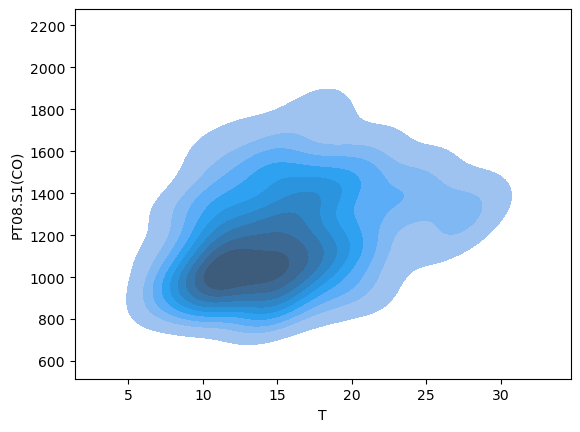

In [82]:
data['T'] = data['T'].astype(str).replace(",",".",regex=True).astype(float)
data['RH'] = data['RH'].astype(str).replace(",",".",regex=True).astype(float)
data['AH'] = data['AH'].astype(str).replace(",",".",regex=True).astype(float)

sns.kdeplot(data,x='T',y='PT08.S1(CO)',fill=True)
